# Predicting Attrition

## The Problem

There are several factors which may cause an employee to quit from a company or organization. Employee turn over, the rate at which a company may lose employees can be costly to a company because the company would likely need to spend resources finding and/or training new employees. If employee attrition is avoidable it would be in the interest of the company to retain said employee. However, it is difficult to determine at any moment why any employee would quit or why they would be likely to quit. To approach this issue I attempt to create a model that can effectively predict employee attrition.

### Importing necessary packages

In [19]:
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, plot_roc_curve, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# The Data

In order to generate a model I use a [dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset?select=WA_Fn-UseC_-HR-Employee-Attrition.csv) of 1470 observations generated by IBM data scientists that has several descriptive factors such as education, work life balance, and performance rating.  There is also a binary attrition category that describes whether or not the employee has quit. Using this dataset I can use binary classification models to demonstrate how well attrition factors can be predicted. 

In [20]:
df = pd.read_csv('HR-Employee-Attrition.csv')

## Cleaning
More details can be found [here](https://github.com/Nella796/predicting_attrition/blob/main/Wrangling%20and%20Analysis.ipynb)

To prepare my data for analysis and testing, I first needed to clean the data and make it interpretable. Ultimately the file was clean with no missing entries. However, several categorical variables were listed ordinally, making them difficult to interpret. I updated the data frame so that these ordinal listings were replaced with the corresponding values. I also deleted a few columns because said columns had no variation across the entire dataset. Thus they were of no use for analysis or modeling.

## EDA and Hypothesis Testing
More details can be found [here](https://github.com/Nella796/predicting_attrition/blob/main/Predicting%20Attrition%20EDA.ipynb)

Before modeling I tried taking a deeper look at some of the features to determine which ones would likely be useful for predicting turn over. I ran chi squared tests on 10 of the categorical variables to see if the cases of turn over were evenly distributed amongst each category. Of the cases I selected, most of the values were significant at the .05 level. Variables such as job satisfaction, Job role, Job involvement, Environment satisfaction, and work life balance, were significant at near or below the .001 level. This leads me to expect that these values will be useful features for modeling and predicting turn over. However, it is possible that the usefulness of the features may change, when the machine learning models asses them concurrently. The following images represent the results for the job satisfaction variable. Click the link above for more details on EDA and hypothesis testing.

![Job Satisfcation](images/EDA/JobSatisfaction_Bar.png)

![Job Satisfcation](images/EDA/JobSatisfaction_cross.png)

##### Lower P values indicate larger statistical significance

![Job Satisfcation](images/EDA/P_values_scaled_008_Job_satisfaction.png)

## Feature Engineering
This report contains the code for the entire feature engineering process. The individual notebook can be found [here](https://github.com/Nella796/predicting_attrition/blob/main/Feature%20Engineering%20and%20Modeling_.ipynb).

To prepare my data for modeling I encoded the attrition variable so that a machine learning odel could understand it. A value for Yes indicating that the person quit was encoded as a 1 while a non attrition case indicated by No was encoded as 0. I then split the data into a training and validation/testing set. The training set contains 925 non attrition cases and 177 attrition cases for a toal of 1102. The validation/testing set contains 308 non attrition cases and 60 attrition cases for a total of 368. The last thing I did before modeling was create scaled versions of the training and testing data to use with my models. There are 3 sets of training and testing sets. One is unscaled, one is scaled using min max scaling, and the last one is scaled using a standard scalar. 

In [23]:
df = df.drop('Unnamed: 0', axis = 1)

### Encoding Categorical Features

In [24]:
# Dividing the data into the features variables (X) and outcome variable (Y)
X = pd.get_dummies(df.drop('Attrition', axis = 1))
y = pd.get_dummies(df['Attrition'], drop_first = True)

### Dividing data into Training and Validation Sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 4)

### Generating scalers for numeric data

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Scaler1 = StandardScaler()
Scaler2 = MinMaxScaler()

In [27]:
scale_variables = list(X_train.select_dtypes('number').columns[1:20])

In [28]:
X_train1 = X_train.copy()
X_train2 = X_train.copy()
X_test1 = X_test.copy()
X_test2 = X_test.copy()

X_train1[scale_variables] = Scaler1.fit_transform(X_train[scale_variables])
X_test1[scale_variables] = Scaler1.transform(X_test[scale_variables])

X_train2[scale_variables] = Scaler2.fit_transform(X_train[scale_variables])
X_test2[scale_variables] = Scaler2.transform(X_test[scale_variables])

## Modeling:

More details on modeling, hyper parameter tuning, and feature importance can be found [here](https://github.com/Nella796/predicting_attrition/blob/main/Feature%20Engineering%20and%20Modeling_.ipynb)

In order to predict turnover, I ran training and validation using different classifcation models and adjusted the hyperparameters with each to see what results I could find. Given the imbalance in the data (there are at least five non attrition cases for each attrition case) finding the best model based on accuracy wouldn't be as informative. The F1 score and the receiver operating characteristic curve (ROC) are metrics which will consider a model's ability to intelligently decipher between attrition and non attrition. The table below summarizes the results of each model. 

In [29]:
pd.read_csv('Predicting Attrition Model data.csv')

,Model Name,F1 Score,AUC,Notes
0,Logistic Regression 1,0.000,0.65,Initial Model
1,Logistic Regression 1.5,0.580,0.83,Added min max scalar
2,Logistic Regression 2,0.510,0.82,Added weight balancing
3,Logistic Regression 3,0.530,0.83,"Hyper Parameter tuning: {C = 1, max_iter = 6600}"
4,Logistic Regression 4,0.550,0.83,"Hyper Parameter tuning: {C = 10, max_iter = 6..."
5,Random Forest 1,0.250,0.76,Initial Model
6,Random Forest 2,0.230,0.76,Added weight balancing
7,Random Forest 3,0.395,0.77,"Parameters: { max_depth = 20, max_features = ..."
8,Random Forest 4,0.297,0.78,"Parameters : { max_depth = None, max_feature..."
9,Random Forest 5,0.300,0.76,"Parameters: { max_depth = 3, max_features = ..."


## Best Model: Logistic Regression 3

The Logistic regression models were found to be the most effective models in the case of this classification problem. It is also noteworthy that although the hyper parameters changed the model effectiveness at certain iteration levels, once each model was allowed to converge there was no noticeable differences between their effectiveness.

[[242  66]
 [ 14  46]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       308
           1       0.41      0.77      0.53        60

    accuracy                           0.78       368
   macro avg       0.68      0.78      0.70       368
weighted avg       0.86      0.78      0.81       368



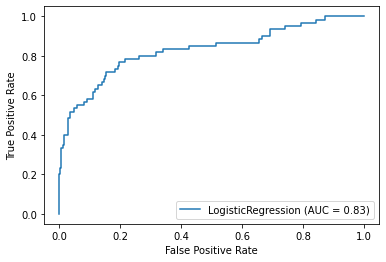

In [31]:
lr3 = LogisticRegression(class_weight = 'balanced', C  = 1, max_iter = 6600)
lr3.fit(X_train2, y_train.values.ravel())
train_predict2= lr3.predict(X_train2)
lr_pred3= lr3.predict(X_test2)
print(confusion_matrix(y_test,lr_pred3))
print(classification_report(y_test,lr_pred3))
plot_roc_curve(lr3, X_test2, y_test)



## F1 Score: 0.53 AUC = .83

## Feature Importance

Below are the most influential features used by the winning model. The positive (blue bar graph) features are the features that indicated to the model which employees were more likely to quit. For instance, Years Since Last Promotion is the largest value for the positive features indicating that the variable is positively correlated and implies that employees who haven't been promoted are more likely to leave. On opposite end the negative features (red bar graph) indicates what factors prevent attrition. Years with current manager is negatively correlated with attrition implying that employees who have spent longer amounts of time with the same manager are more likely to stay. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

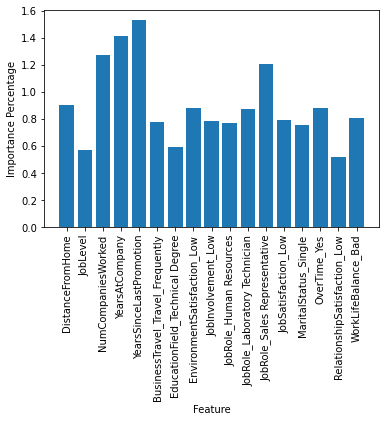

In [34]:
lr3_fi = {}
lr3_fi2 = {}
for feature, importance in zip(list(X_train.columns), lr3.coef_.tolist()[0]):
    lr3_fi[feature] = importance
    if importance > .5:
        lr3_fi2[feature] = importance
#     print('Feature: ', feature, 'Score: ', importance)

# plt.bar(list(X_train.columns), rf4.feature_importances_)

plt.bar(lr3_fi2.keys(), lr3_fi2.values())
plt.xlabel('Feature')
plt.ylabel('Importance Percentage')
plt.xticks(rotation = 90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

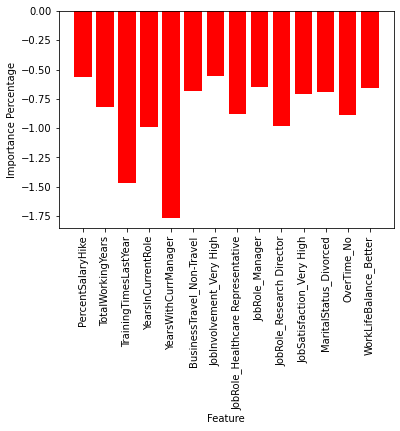

In [35]:
lr3_fi = {}
lr3_fi2 = {}
for feature, importance in zip(list(X_train.columns), lr3.coef_.tolist()[0]):
    lr3_fi[feature] = importance
    if importance < -.5:
        lr3_fi2[feature] = importance
#     print('Feature: ', feature, 'Score: ', importance)

# plt.bar(list(X_train.columns), rf4.feature_importances_)

plt.bar(lr3_fi2.keys(), lr3_fi2.values(), color = 'red')
plt.xlabel('Feature')
plt.ylabel('Importance Percentage')
plt.xticks(rotation = 90)

## Conclusion

The results of the model and the respective feature importances provide information on an employees likelihood to quit along with what factors may be driving those decisions. If a company has this kind of data they can determine which employees are likely to quit on an individual level. This allows them to preemptively research a solution or offer an incentive to retain an employee that would be less costly than searching for a replacement. The feature importances give a list of factors that can be individually focused on in order to prevent turnover. For instance, the data used for this project indicates a negative correlation between years with current manager and likelihood of quitting. As a business owner, this might indicate that a focus on retaining managers will also retain other employees or that training a new manager from within the company might be less costly than bringing in a manager from outside. The information produced from the model clearly outlines characteristics that are likely causing turn over. The blueprint that this model provides can lead to actionable solutions which reduce turnover and save resources. 